In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:90% !important; }</style>'))

In [3]:
import os
import sys
stbl_root_path = os.path.abspath('..')
if stbl_root_path not in sys.path:
    print('inserting the following to path',stbl_root_path)
    sys.path.insert(0,os.path.abspath('..'))
    print(sys.path)

inserting the following to path /home/gkoren2/PycharmProjects/remote/MLA/RL/stable-baselines
['/home/gkoren2/PycharmProjects/remote/MLA/RL/stable-baselines', '/home/gkoren2/PycharmProjects/remote/MLA/RL/stable-baselines/my_colabs', '/opt/anaconda3/envs/tf15/lib/python37.zip', '/opt/anaconda3/envs/tf15/lib/python3.7', '/opt/anaconda3/envs/tf15/lib/python3.7/lib-dynload', '', '/opt/anaconda3/envs/tf15/lib/python3.7/site-packages', '/opt/anaconda3/envs/tf15/lib/python3.7/site-packages/IPython/extensions', '/home/gkoren2/.ipython']


In [4]:
import numpy as np
import tensorflow as tf
import gym
from my_zoo.utils.common import suppress_tensorflow_warnings, set_gpu_device
set_gpu_device('0')
suppress_tensorflow_warnings()
print(tf.__version__)
import matplotlib.pyplot as plt
%matplotlib notebook

1 Physical GPUs, 1 Logical GPU
1.15.0


# Start experiment here

In [6]:
from stable_baselines.dbcq.dbcq import DBCQ
from stable_baselines.dbcq.expert_dataset import generate_experience_traj,load_experience_traj

In [9]:
model_file_name = '/home/gkoren2/share/Data/MLA/stbl/results/dbcq_l2p_csv-18-03-2020_10-24-21/1/model_params.zip'
model = DBCQ.load(model_file_name)

Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [10]:
data_file_name =  '/home/gkoren2/share/Data/MLA/stbl/erbufs/L2_data_rnd_RL.npz'
data=np.load(data_file_name,allow_pickle=True)
len(data['actions'])

98892

In [11]:
Y=data['actions']
X=data['obs']
X.shape

(98892, 7)

In [14]:
y_pred=model.predict(X,deterministic=True)

<IPython.core.display.Javascript object>


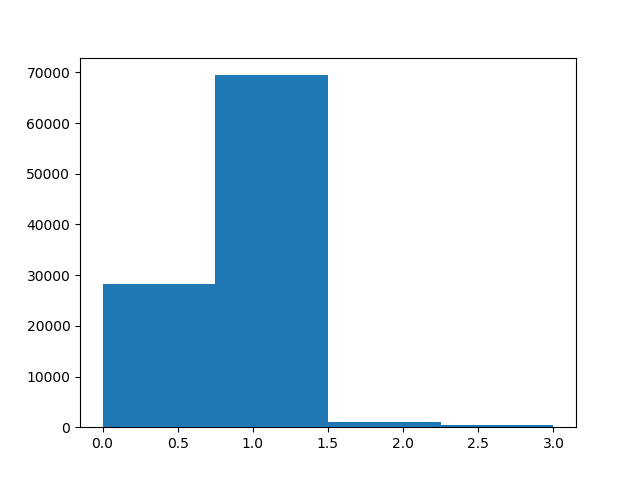

(array([28168., 69443.,   938.,   343.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 4 Patch objects>)

In [21]:
plt.hist(y_pred[0],bins=4)

## load another dataset 
we'll have to load it from csv

In [ ]:
# data=load_experience_traj(csv_or_np_file)
